# Exploratory Data Analysis

In [7]:
import datetime
import calendar
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8

# Load project data

After loading we will have series:

  * Flow Sampled at 5 minutes interval
  * Rainfall sampled at 1 hour interval
  * No NaNs
  * Starting and ending at the same time

In [8]:
project_folder = '../../datasets/radon-medium/'
df = pd.read_csv(project_folder + 'flow1.csv', parse_dates=['time'])
flow = df.set_index('time')['flow'].fillna(0).resample('5T').pad()
df = pd.read_csv(project_folder + 'rainfall1.csv', parse_dates=['time'])
rainfall = df.set_index('time')['rainfall'].fillna(0).resample('5T').sum()
print('Flow date range    : {:} - {:}'.format(flow.index[0], flow.index[-1]))
print('Rainfall date range: {:} - {:}'.format(rainfall.index[0], rainfall.index[-1]))

Flow date range    : 2013-09-09 10:50:00 - 2017-11-10 14:40:00
Rainfall date range: 2014-10-24 00:00:00 - 2017-11-10 19:25:00


Based on the data we will use the following range: **2014-10-24** - **2017-11-09**

In [9]:
flow = flow['2014-10-24':'2017-11-09']
rainfall = rainfall['2014-10-24':'2017-11-09']
print('Flow date range    : {:} - {:}'.format(flow.index[0], flow.index[-1]))
print('Rainfall date range: {:} - {:}'.format(rainfall.index[0], rainfall.index[-1]))

Flow date range    : 2014-10-24 00:00:00 - 2017-11-09 23:55:00
Rainfall date range: 2014-10-24 00:00:00 - 2017-11-09 23:55:00


# Helper functions

In [49]:
df = flow.to_frame().reset_index()
daily_pattern = df.groupby(by=[df.time.map(lambda x: x.time())]).flow.median()


def plot_days(xs, start_day, end_day):
    """Plot series for specific data range"""
    df = xs[pd.Timestamp(start_day): pd.Timestamp(end_day)]
    df.plot()
    plt.show()    


def plot_rdii(start_day, end_day):
    xs = flow[pd.Timestamp(start_day): pd.Timestamp(end_day)]
    base_flow = pd.Series(xs.index.map(lambda x: daily_pattern[x.time()]), xs.index)
    ys = rainfall[pd.Timestamp(start_day): pd.Timestamp(end_day)]
    # Plot rainfall
    plt.figure(1)
    plt.subplot(211)
    ax = ys.plot.bar(width=0.1, edgecolor='lightblue', color='lightblue', ylim=(5, 0))
    ax.set_xticks([])
    # Plot flow
    plt.subplot(212)
    xs.plot()
    base_flow.plot()
    plt.show()

# Find biggest storms

To find biggest storms we will sum all rainfalls for each day, and the select days with the biggest total precipitation

In [11]:
df = rainfall.resample('D').sum()
df.sort_values(ascending=False).head(10)

time
2015-10-28    49.8
2017-06-17    45.6
2017-06-23    44.0
2015-08-10    42.8
2015-05-30    37.4
2015-06-22    35.8
2017-05-25    35.0
2015-04-20    35.0
2015-06-27    34.4
2017-07-07    33.0
Name: rainfall, dtype: float64

# Plot storm days

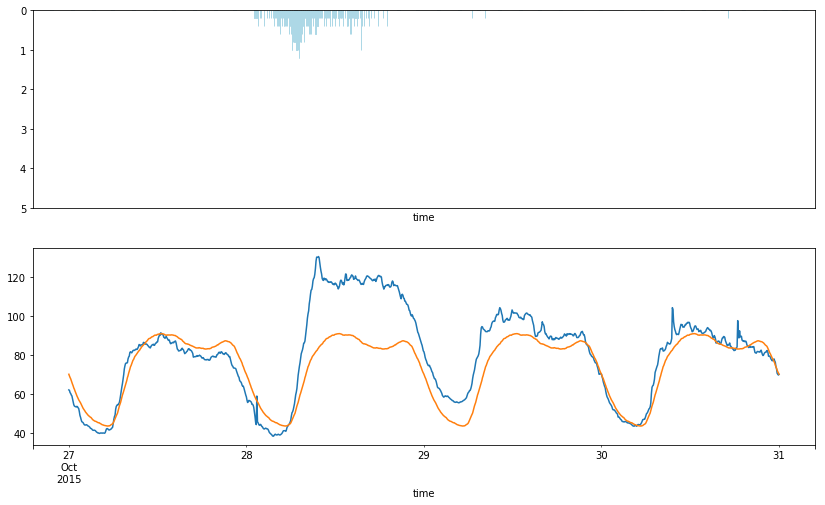

In [50]:
plot_rdii('2015-10-27', '2015-10-31')

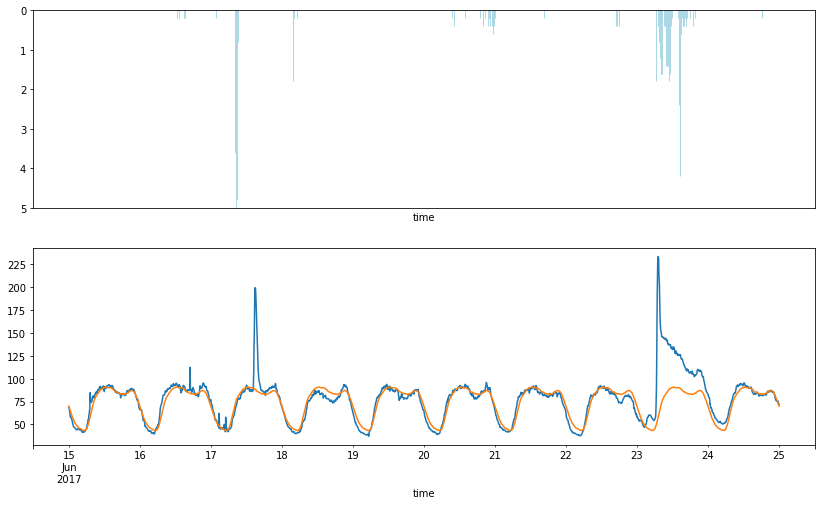

In [51]:
plot_rdii('2017-06-15', '2017-06-25')

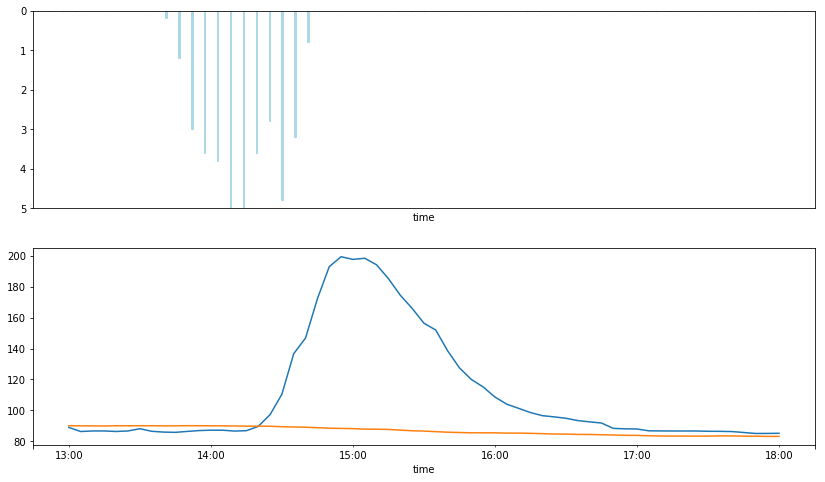

In [52]:
plot_rdii('2017-06-17 13:00', '2017-06-17 18:00')

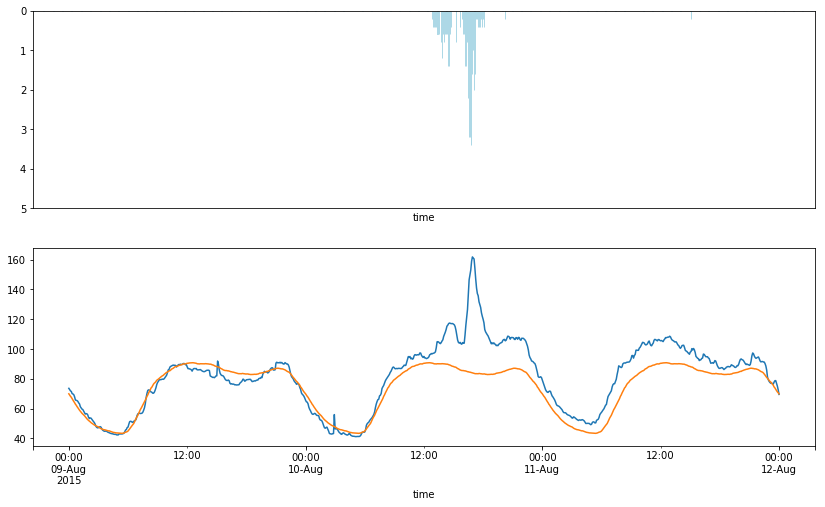

In [53]:
plot_rdii('2015-08-09', '2015-08-12')

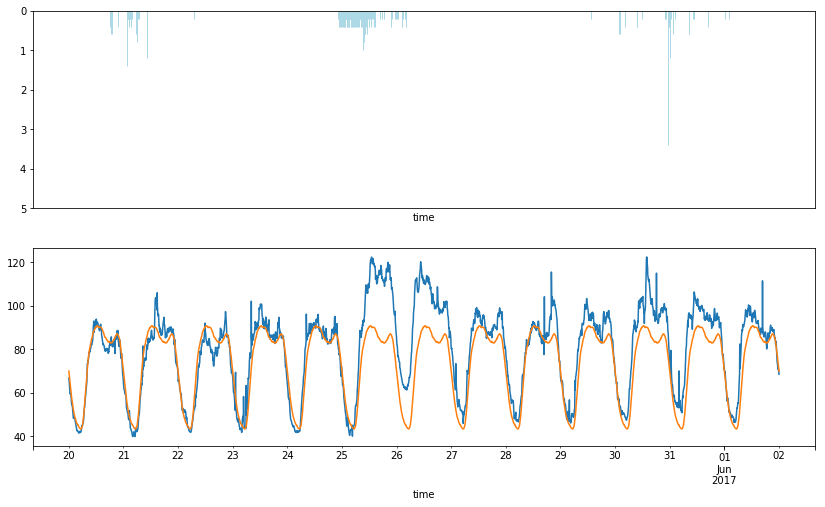

In [54]:
plot_rdii('2017-05-20', '2017-06-02')

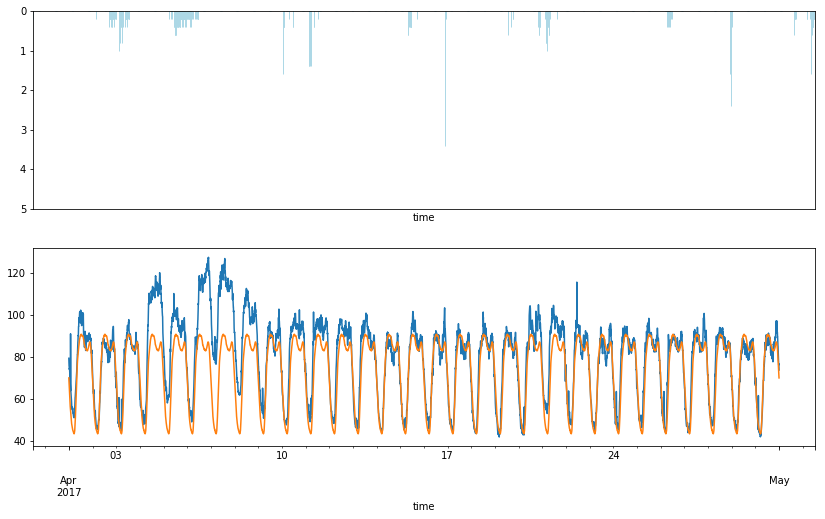

In [55]:
plot_rdii('2017-04-01', '2017-05-01')